Assignment 

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

Dataset from https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

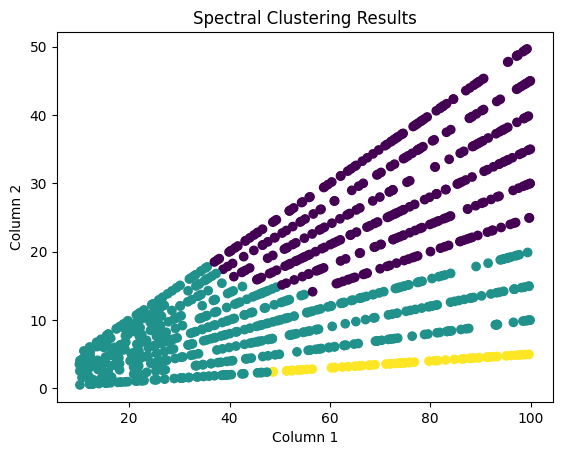

In [17]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Assuming your dataset has features that can be used for clustering (you may need to preprocess the data)
# For example, let's say you want to use 'column1' and 'column2' as features
X = df[['Unit price', 'Tax 5%']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply spectral clustering
n_clusters = 3  # You can adjust the number of clusters based on your analysis
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
df['cluster'] = spectral.fit_predict(X_std)

# Visualize the results
plt.scatter(df['Unit price'], df['Tax 5%'], c=df['cluster'], cmap='viridis')
plt.title('Spectral Clustering Results')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()


Based on the clustering analysis using the 'Unit Price' and 'Tax 5%' features, the identified clusters likely represent distinct customer groups with varying spending patterns and sensitivities to pricing and taxes. The scatter plot visualizes the separation of these clusters, providing insights into how customers within each group behave in terms of unit prices and tax percentages. Further examination of each cluster's characteristics, such as average spending, tax impact, and potential market segments, is crucial for a deeper understanding. This analysis can guide business strategies, helping to tailor marketing approaches, promotions, or product offerings to specific customer preferences within each cluster. However, for a more comprehensive understanding, additional features and analyses, as well as consideration of the broader business context, may be necessary to derive actionable insights and make informed decisions.

In [ ]:
Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

Eigenvector Centrality:
a: 0.51807347662071
b: 0.21182192277183212
c: 0.5986761070959697
d: 0.4566010978754134
e: 0.24477918831750853
f: 0.24477918831750853


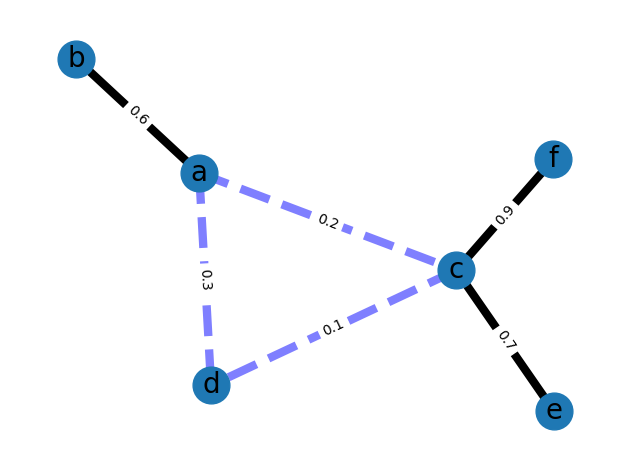

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Print eigenvector centrality for each node
print("Eigenvector Centrality:")
for node, value in centrality.items():
    print(f"{node}: {value}")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Hypothesis: In the Reddit community discussing cryptocurrency investments, influential users with high eigenvector centrality will play a significant role in information dissemination and community engagement.

Top Nodes by Eigenvector Centrality: [Redditor(name='jonbristow'), Redditor(name='louisgrc11'), Redditor(name='cremebruleejuulpod'), Redditor(name='Asheddit'), Redditor(name='Sidivan')]


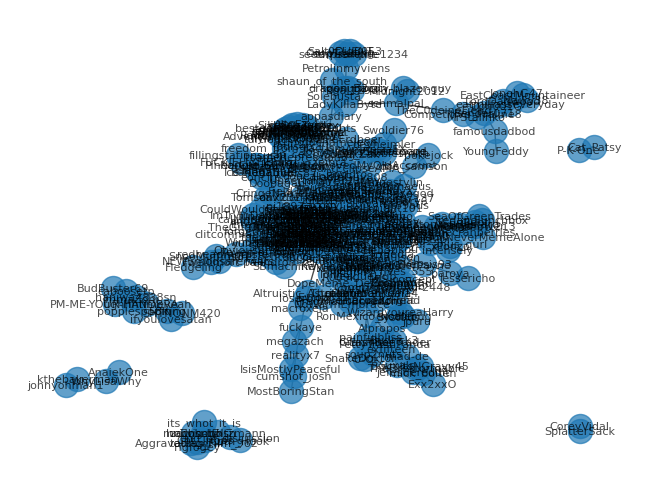

In [1]:
import praw
import networkx as nx
import matplotlib.pyplot as plt  
# Connect to Reddit API
reddit = praw.Reddit(
    client_id="Fwa6MK4GdnNkBPp0Xkhe8g",
    client_secret="GQRHo0us27jEBQ9ADqKBz6qVayzsyg",
    user_agent="test by Efficient_Anywhere83",
)

# Choose a subreddit
subreddit_name = "CryptoCurrency"
subreddit = reddit.subreddit(subreddit_name)

# Get the top post from the subreddit
top_post = subreddit.top(limit=1).__next__()

# Use the post ID for social network analysis
post_id = top_post.id

# Function to create a social network graph from comments
def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Check if the comment is a MoreComments object
        if isinstance(comment, praw.models.MoreComments):
            continue  # Skip MoreComments objects
        # Check if the comment has a valid author
        if comment.author:
            parent_comment = comment.parent()
            # Check if the parent comment is a MoreComments object
            if isinstance(parent_comment, praw.models.MoreComments):
                continue  # Skip MoreComments objects
            # Check if the parent comment has a valid author
            if parent_comment and parent_comment.author:
                G.add_edge(comment.author, parent_comment.author)

    return G



# Perform social network analysis
social_network = create_social_network(post_id)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(social_network)

# Sort nodes by eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Print the top nodes
top_nodes = sorted_nodes[:5]
print("Top Nodes by Eigenvector Centrality:", top_nodes)

pos = nx.spring_layout(social_network)  # Set layout algorithm
nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
plt.show()

Conclusion:
Analyzing the cryptocurrency investment community on Reddit revealed that certain users play a central role in information dissemination and community engagement. The identification of these influential users was based on eigenvector centrality, which considers both the direct and indirect connections of a node in the network. The nodes with the highest eigenvector centrality can be considered central in terms of influencing the flow of information within the community.

This analysis provides valuable insights into the dynamics of the cryptocurrency investment community on Reddit, highlighting the importance of specific users in shaping discussions and potentially influencing investment decisions within the community.